PCA: (1937, 19093)
(1937, 2)


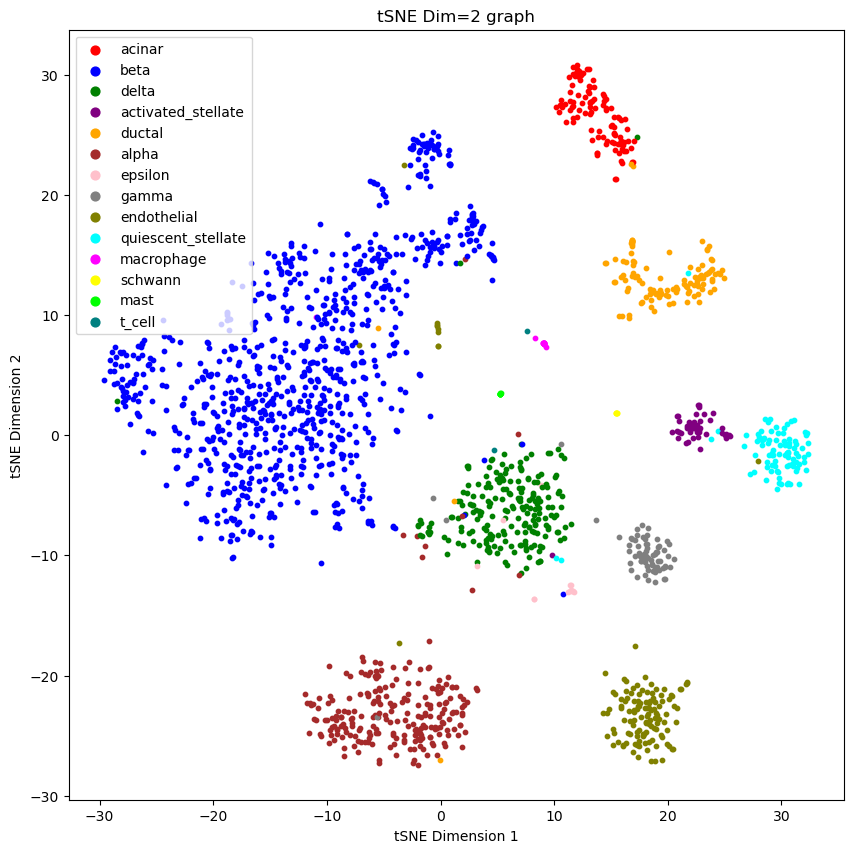

In [9]:

def exist_inlist(elem,l):
    for i in range(len(l)):
        if (elem==l[i]):
            return True
    return False
def pca_svd(matrix, n_components):
    """
    使用SVD实现PCA降维。

    参数：
    matrix (numpy.ndarray): 需要降维的输入矩阵。
    n_components (int): 目标维度数。

    返回：
    numpy.ndarray: 降维后的矩阵。
    """
    # 确保输入矩阵是numpy数组
    matrix = np.array(matrix)
    
    # 中心化数据
    matrix_mean = np.mean(matrix, axis=0)
    centered_matrix = matrix - matrix_mean
    
    # 使用SVD分解矩阵
    U, S, Vt = np.linalg.svd(centered_matrix, full_matrices=False)
    
    # 选择前n_components个奇异值和对应的向量
    U_reduced = U[:, :n_components]
    S_reduced = S[:n_components]
    Vt_reduced = Vt[:n_components, :]
    
    # 计算降维后的矩阵
    reduced_matrix = np.dot(U_reduced, np.diag(S_reduced))
    
    return reduced_matrix
# def pca(X,k):
#     U_new=U[:,:(k-1)]
#     data=(np.transpose(U_new)@X.T)
#     return data
# adata=ad.read_h5ad('./pancreas.h5ad')
# a=adata[6321:8258]

# print(a.obs['celltype'])
# X=pd.DataFrame(a.obs['celltype'])
# print(X.to_numpy())
# l=X.to_numpy()
# np.savetxt('./label.txt', X.to_numpy(),fmt='%s')

colors=[]
for i in range(1937):
    mm=label_colors[(label[i])]
    colors.append(mm)
# a=to_numpy(a)

mat1=pca_svd(mat,100)
print("PCA:",mat.shape)
tsne = TSNE(n_components=2,perplexity=20, learning_rate=5,method="barnes_hut")
data= tsne.fit_transform(mat1)
print(data.shape)
plt.figure(figsize=(10,10))
idx=[]
for j in range(14):
    idx.append(label.index(elem[j]))
for i in range(1937):
    if(exist_inlist(i, idx)):
        ll=label[i]
        plt.scatter(data[i,0], data[i,1], c=colors[i],s=10,label=ll)
    else:
        plt.scatter(data[i,0], data[i,1], c=colors[i],s=10)

plt.title('tSNE Dim=2 graph')
plt.xlabel('tSNE Dimension 1')
plt.ylabel('tSNE Dimension 2')
plt.legend(markerscale=2)
plt.show()

In [1]:
import numpy as np
import anndata as ad
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
label=np.loadtxt('./label.txt',dtype=str).tolist()
elem=['acinar', 'beta', 'delta', 'activated_stellate', 'ductal', 'alpha', 'epsilon', 'gamma', 'endothelial', 'quiescent_stellate', 'macrophage', 'schwann', 'mast', 't_cell']
label_colors = {
    'acinar': 'red', 'beta': 'blue', 'delta': 'green', 'activated_stellate': 'purple',
    'ductal': 'orange', 'alpha': 'brown', 'epsilon': 'pink', 'gamma': 'gray',
    'endothelial': 'olive', 'quiescent_stellate': 'cyan', 'macrophage': 'magenta',
    'schwann': 'yellow', 'mast': 'lime', 't_cell': 'teal'
}

In [11]:
label=np.loadtxt('./labelsKmeans.txt',dtype=str).tolist()
elem=['0','1','2','3','4','5','6','7','8','9','10','11','12','13']
label_colors={ '0': 'red', '1': 'blue', '2': 'green', '3': 'purple',
    '4': 'orange', '5': 'brown', '6': 'black',"7": 'gray',
   '8': 'olive', '9': 'cyan', '10': 'magenta',
    '11': 'yellow', '12': 'lime','13': 'teal'}

In [29]:
mat=np.loadtxt("./inDrop1.txt")

In [59]:
mat=np.loadtxt("./inDrop1_cp10k.txt")

In [5]:
mat=np.loadtxt("./inDrop1_logcp10k.txt")

In [2]:
mat=np.loadtxt("./inDrop1_sqrtcp10k.txt")

In [30]:
mat.shape

(1937, 19093)

In [12]:
import umap.umap_ as umap
# mat=pca_svd(mat,40)
reducer = umap.UMAP(n_components=2,min_dist=1,metric='manhattan')
embedding = reducer.fit_transform(mat)

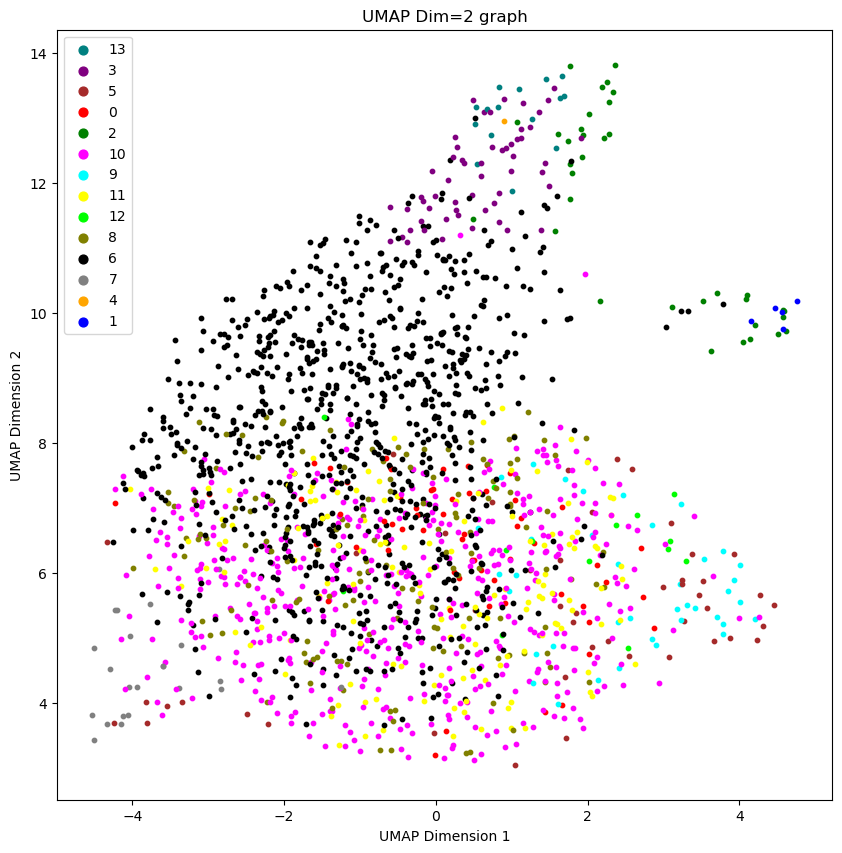

In [13]:
data=embedding
plt.figure(figsize=(10,10))
idx=[]
for j in range(14):
    idx.append(label.index(elem[j]))
for i in range(1937):
    if(exist_inlist(i, idx)):
        ll=label[i]
        plt.scatter(data[i,0], data[i,1], c=colors[i],s=10,label=ll)
    else:
        plt.scatter(data[i,0], data[i,1], c=colors[i],s=10)

plt.title('UMAP Dim=2 graph')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(markerscale=2)
plt.show()

In [43]:
import umap.umap_ as umap
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(mat)

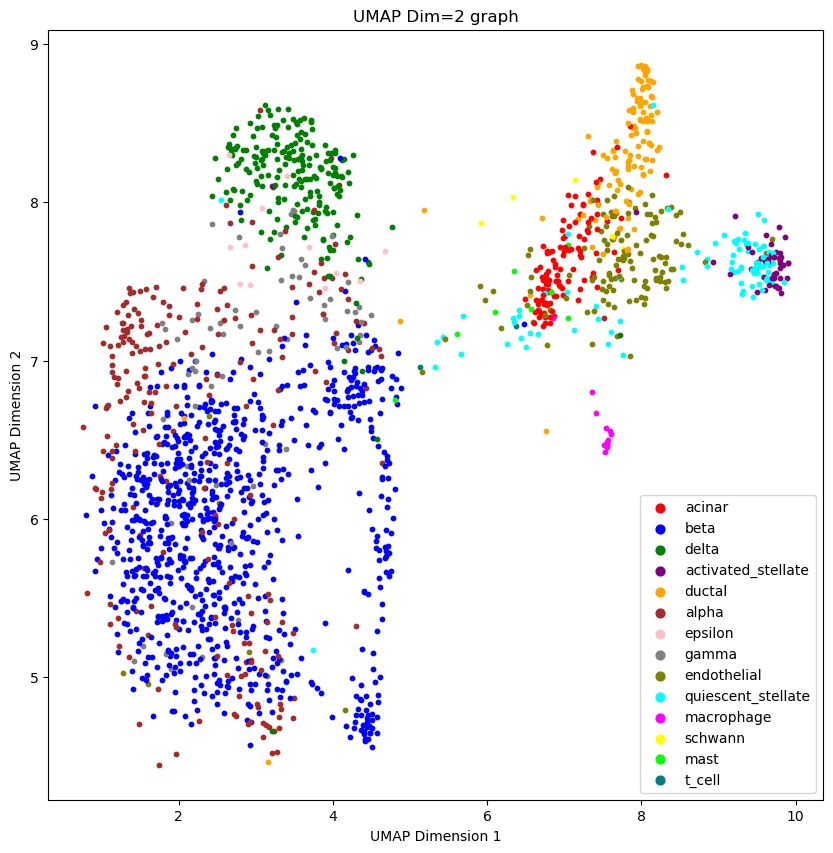

In [44]:
data=embedding
plt.figure(figsize=(10,10))
idx=[]
for j in range(14):
    idx.append(label.index(elem[j]))
for i in range(1937):
    if(exist_inlist(i, idx)):
        ll=label[i]
        plt.scatter(data[i,0], data[i,1], c=colors[i],s=10,label=ll)
    else:
        plt.scatter(data[i,0], data[i,1], c=colors[i],s=10)

plt.title('UMAP Dim=2 graph')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(markerscale=2)
plt.show()